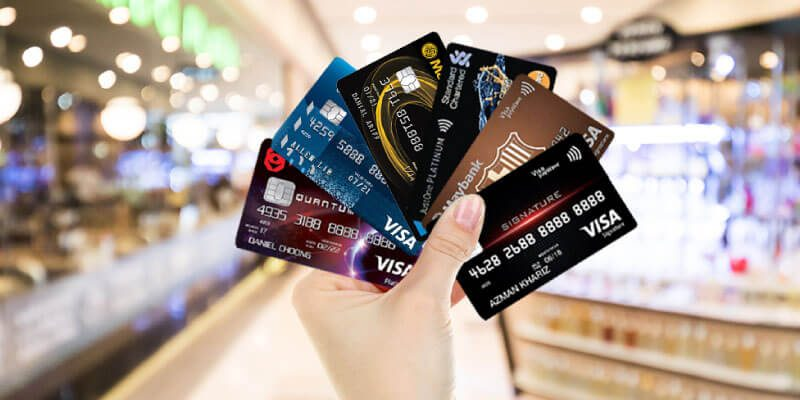

In [1]:
from IPython.display import display, Image
display(Image(filename='CreditCard.jpg'))

# AllLife Credit Card Customer Segmentation

## Background: 
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.
Objective: To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

## Data Description:

Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

# Exploratory Data Analysis

In [2]:
#IMPORTING LIBRARY
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

In [3]:
#IMPORTING DATA
cdata = pd.read_excel('Credit Card Customer Data.xlsx')
cdata.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


# Univeriate Data Analysis

In [4]:
# Data length and Breadth
cdata.shape

(660, 7)

In [5]:
# Data Info
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [6]:
# Data Type
cdata.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [7]:
#Checking missing values
cdata.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [8]:
#Check for zeros
(cdata[:][:] == 0).sum()

Sl_No                    0
Customer Key             0
Avg_Credit_Limit         0
Total_Credit_Cards       0
Total_visits_bank      100
Total_visits_online    144
Total_calls_made        97
dtype: int64

In [9]:
#Number of Unique data
cdata.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [10]:
#Number of negative values
(cdata[:][:] < 0).sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [11]:
#Describe Table
cdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [12]:
# Duplicate Check
cdata.duplicated().sum()

0

### Insightes

* The data has 660 records with 7 attributes
* All Intergers
* Data is clean with
* No null data
* No duplicates
* No negative values
* SI_NO - is serial number from 1-660 
* Customer_Key - is the randon 5 digit numbers
* Zeros available for the columns Total_Visits_Bank, Total_Visit_Online and Total_calls_made which is valid
* Average_Credit_Limit - mean = 34574.24 ranges from 11265 to 99843 - Normally distributed - right skewed (positively).
* Total_Credit_Cards - mean = 4.7 ranges from 1 to 10 - Normally distributed with 4 groups tentatively.
* Total_Visits_bank - mean = 2.4 ranges from 0 to 5 - Normally distributed with high variance.
* Total_Visits_Online - mean = 2.6 ranges from 0 to 15 - Normally distributed - right skewed (Positively).
* Total_calls_made - mean = 3.6 ranges from 0 to 10 - Normally distributed - right skewed - high dispersion.


**Insights**

* Sl_No -  Number of rows in data and number of unique values in this column are same. It can be confirmed that Sl_No is the record identifier. Dropping this column.

* Customer Key - Number of rows in data and number of unique values in this column are almost the same. This column appears like a broken key, and can be dropped. However, since there are 5 duplicate records in data, however there is no duplicates within the tables so not removing the duplicates.

In [13]:
cdata = cdata.drop(['Sl_No','Customer Key'], axis=1)

AVG_CREDIT_LIMIT :


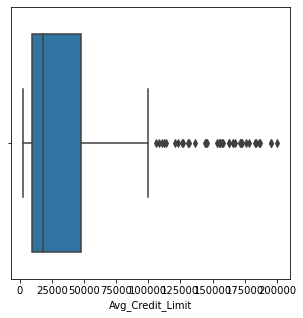

TOTAL_CREDIT_CARDS :


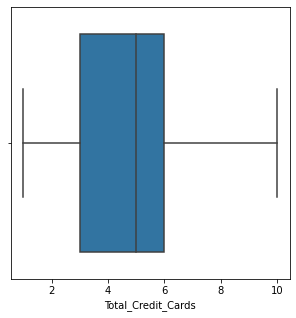

TOTAL_VISITS_BANK :


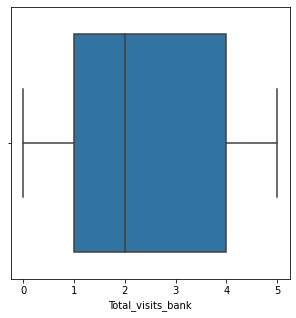

TOTAL_VISITS_ONLINE :


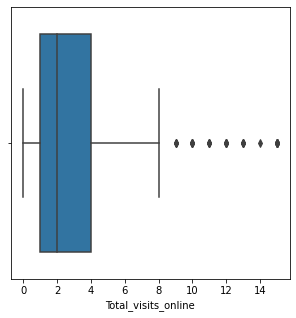

TOTAL_CALLS_MADE :


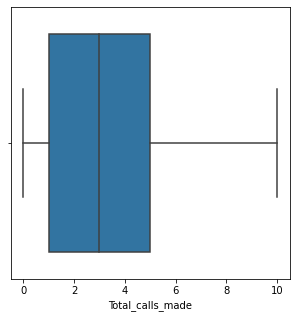

In [14]:
#Box plot to check outlier individual collumns
for i in cdata.columns:
    print(i.upper(),":")
    plt.figure(figsize=(5,5))
    sns.boxplot(x=cdata[i])
    plt.show()

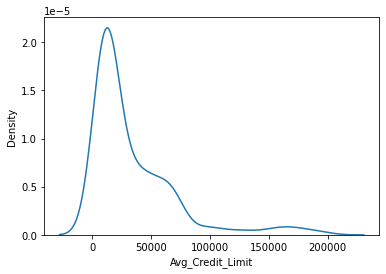

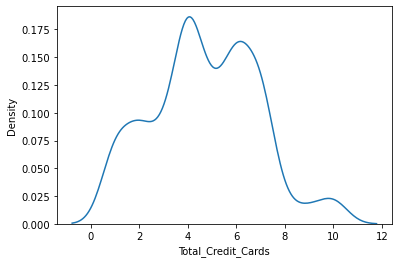

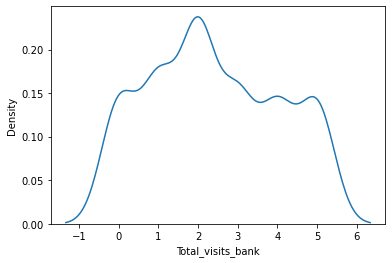

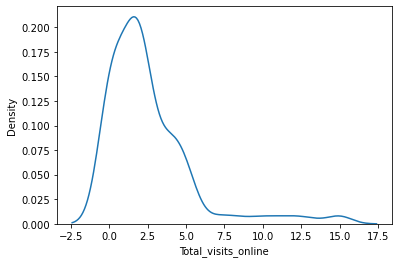

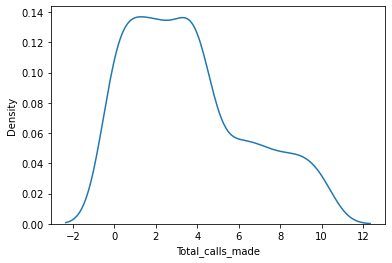

In [15]:
# Distplot for continous columns
for i in cdata.columns:
    sns.distplot(cdata[i],hist=False,)
    plt.show()

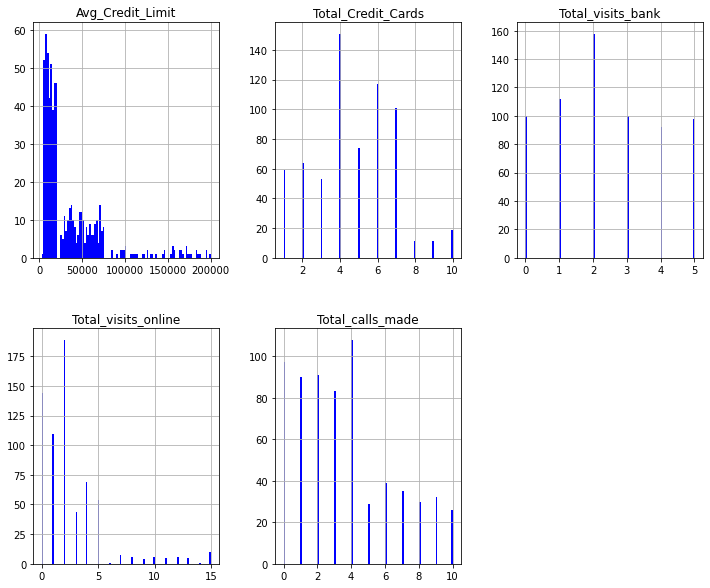

In [16]:
columns = list(cdata)[:]
cdata[columns].hist(stacked=False, bins=100, figsize=(12,55), layout=(10,3), color='Blue'); 

In [17]:
# ##Value counts of all categorical columns.
for i in cdata.columns:
    k=cdata[i].value_counts(normalize=True)
    print('\n',i,'\n', k,'\n')


 Avg_Credit_Limit 
 8000     0.053030
6000     0.046970
13000    0.042424
9000     0.042424
10000    0.039394
           ...   
99000    0.001515
98000    0.001515
55000    0.001515
97000    0.001515
43000    0.001515
Name: Avg_Credit_Limit, Length: 110, dtype: float64 


 Total_Credit_Cards 
 4     0.228788
6     0.177273
7     0.153030
5     0.112121
2     0.096970
1     0.089394
3     0.080303
10    0.028788
8     0.016667
9     0.016667
Name: Total_Credit_Cards, dtype: float64 


 Total_visits_bank 
 2    0.239394
1    0.169697
0    0.151515
3    0.151515
5    0.148485
4    0.139394
Name: Total_visits_bank, dtype: float64 


 Total_visits_online 
 2     0.286364
0     0.218182
1     0.165152
4     0.104545
5     0.081818
3     0.066667
15    0.015152
7     0.010606
8     0.009091
10    0.009091
12    0.009091
11    0.007576
13    0.007576
9     0.006061
6     0.001515
14    0.001515
Name: Total_visits_online, dtype: float64 


 Total_calls_made 
 4     0.163636
0     0.146970
2   

**Insights**

* Majority 50 percent customers possess between 4 and 7 cards.
* Around 70 percent customers have less than 3 Total_visits_bank.
* Around 66 percent customers have less than 2 Total_visits_online
* Around 68 percent customers have less than 4 Total_calls_made.

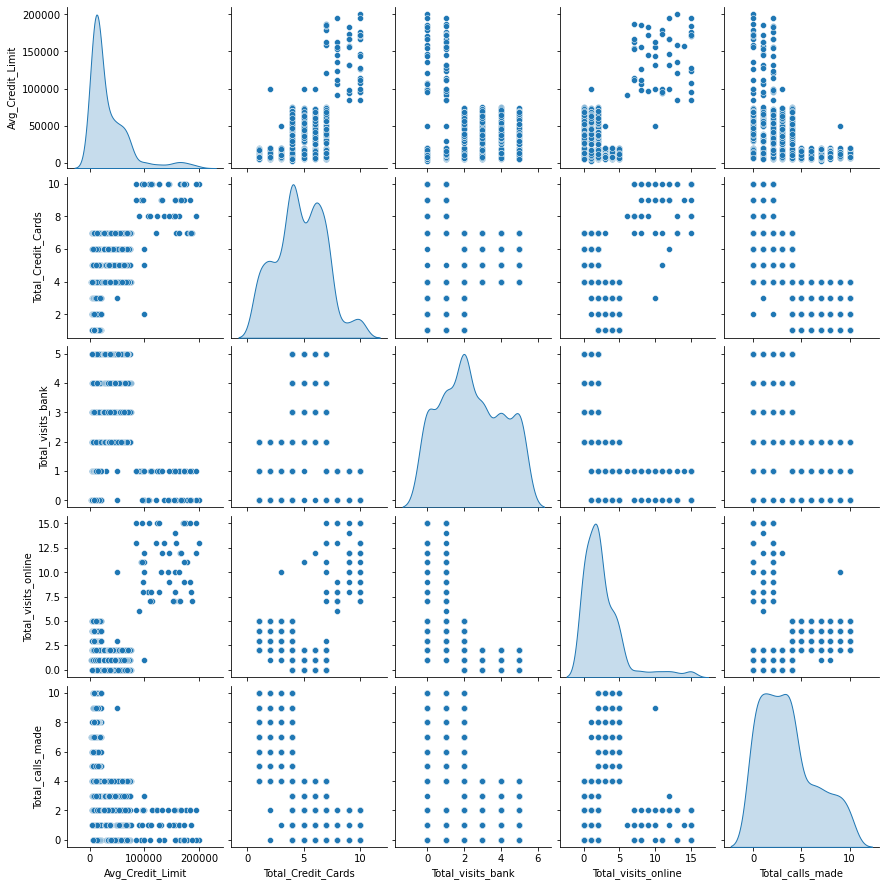

In [18]:
sns.pairplot(data=cdata,diag_kind='kde')

<AxesSubplot:>

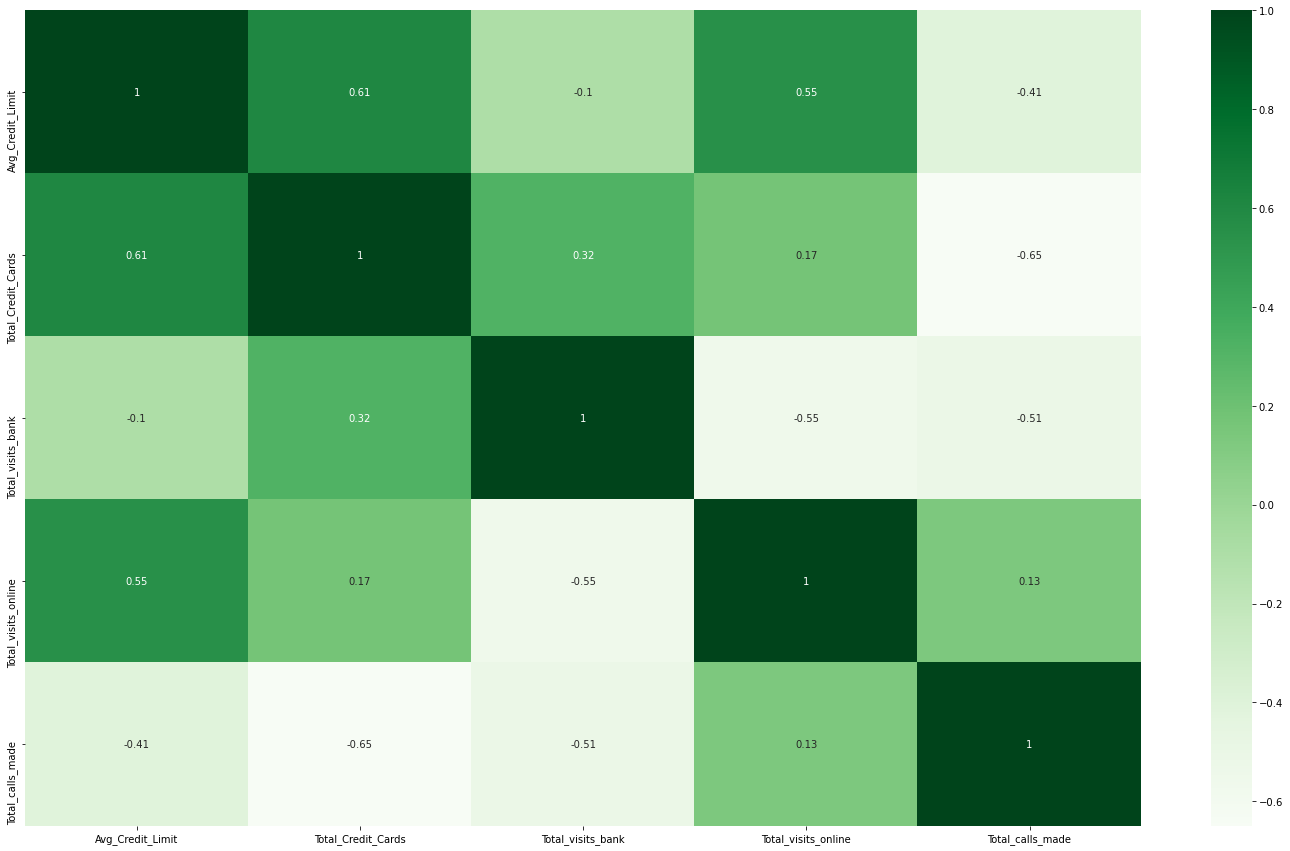

In [19]:
plt.figure (figsize = (25,15))
new = cdata.corr().round(2)
sns.heatmap(new, annot=True,cmap='Greens')

**Insightes**

* Pairplot shows there are pattern in column combination almost all the pairs
* Paiplot diagnal plots shows 3 or 4 bumps which shows there are possibility of 3 or 4 clusters available
* Average_Credit_Limit is correlated with Total_Calls_mades and Total_Credit_Cards were highly correlated with (0.61) & (0.55) respectively.

* Avg_Credit_Limit seems to have strong +ve correlation with Total_Credit_Cards and Total_visits_online and vice versa.
* Total_Credit_Cards has strong negative correlation with Total_calls_made and vice versa.
* Total_Visits_bank has strong negative correlation with Total_visits_online and Total_calls_made and vice versa. 
* It clear evidene customers who prefer online usually not opt for other modes of communication.

* None of the attributes show a symmetric distribution.
* Columns Total_Credit_Cards, Total_visits_bank, and Total_calls_made seem fairly distributed, although there are multiple peaks.
* Distplots for Total_visits_online and Avg_Credit_Limit look similar. They both are right skewed. There are upper outliers in these two columns

## Scaling Data

In [20]:
sdata=cdata.iloc[:,1:]
sdata=sdata.apply(zscore)

## K-Mean Clustering

In [21]:
# Variables are mow scaled. Let us now try to create clusters

cluster_range = range(2,10)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(sdata)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,1496.252484
1,3,753.338669
2,4,601.962926
3,5,526.821026
4,6,482.610196
5,7,439.711546
6,8,420.767396
7,9,377.061793


### Insights

**The error pattern shows 3 , 4 and 5th clusters there are not much reduction in patterns which shows 3 4 or 5 clusters appropriate**

2 score  0.454
3 score  0.543
4 score  0.387
5 score  0.311
6 score  0.288
7 score  0.28
8 score  0.268
9 score  0.263


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

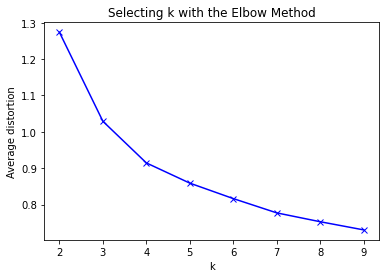

In [22]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(2,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(sdata)
    prediction=model.predict(sdata)
    meanDistortions.append(sum(np.min(cdist(sdata, model.cluster_centers_, 'euclidean'), axis=1)) / sdata.shape[0])
    s_score = silhouette_score(sdata,prediction)
    print(k,"score ",s_score.round(3))


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

### Insights

**The L-bow pattern shows 3 and 4 clusters the line bends which shows 3 or 4 clusters appropriate**

**Concentrating only on K=3 and K=4**

In [23]:
# We could see the bend at 3 and 4
clusters=range(2,6)

for k in clusters:
    kmeans = KMeans(n_clusters=k, n_init = 5, random_state=12345)
    kmeans.fit(sdata)
    # Check the number of data in each cluster
    labels = kmeans.labels_
    counts = np.bincount(labels[labels>=0])
    print("When K = ",k,counts)

When K =  2 [435 225]
When K =  3 [387 223  50]
When K =  4 [190 219 201  50]
When K =  5 [120 190  50 103 197]


In [24]:
# Distribution looks fine.

# let us check the centers in each group
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(sdata) )
centroid_df.transpose()

,0,1,2,3,4
Total_Credit_Cards,-0.979935,0.356795,1.862226,-1.159586,0.386432
Total_visits_bank,-0.870672,1.295713,-1.105763,-0.943809,0.054800
Total_visits_online,0.284850,-0.543901,2.827319,0.372582,-0.561333
Total_calls_made,0.617037,-0.575064,-0.874330,1.776567,-0.528184


## When K=3

In [25]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(sdata)
prediction=final_model.predict(sdata)

#Append the prediction 
sdata["GROUP"] = prediction
cdata["GROUP"] = prediction
print("Groups Assigned : \n")
cdata.head()

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,2


In [26]:
sdata['GROUP'].unique()

array([0, 1, 2])

In [27]:
gdata = sdata.groupby(['GROUP'])
gdata.mean()

,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,
0,0.371882,0.664034,-0.552775,-0.551200
1,-1.062913,-0.904453,0.325372,1.152605
2,1.862226,-1.105763,2.827319,-0.874330


## BOX PLOT Analysis - K= 3

array([[<AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[GROUP]'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

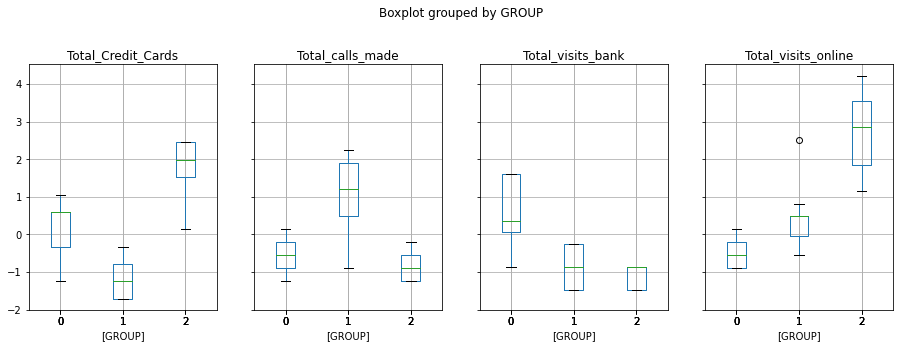

In [28]:
sdata.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [29]:
cdataG0 = cdata[cdata['GROUP']==0]
cdataG0.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,387.0,33713.178295,22182.542428,5000.0,13000.0,31000.0,52000.0,100000.0
Total_Credit_Cards,387.0,5.511628,1.141195,2.0,4.0,6.0,6.0,7.0
Total_visits_bank,387.0,3.485788,1.136616,1.0,2.5,3.0,5.0,5.0
Total_visits_online,387.0,0.984496,0.857619,0.0,0.0,1.0,2.0,3.0
Total_calls_made,387.0,2.005168,1.432406,0.0,1.0,2.0,3.0,4.0
GROUP,387.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [30]:
cdataG1 = cdata[cdata['GROUP']==1]
cdataG1.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,223.0,12197.309417,5249.332169,3000.0,8000.0,12000.0,16000.0,50000.0
Total_Credit_Cards,223.0,2.403587,1.098068,1.0,1.0,2.0,3.0,4.0
Total_visits_bank,223.0,0.928251,0.802171,0.0,0.0,1.0,2.0,2.0
Total_visits_online,223.0,3.560538,1.217242,1.0,2.5,4.0,4.0,10.0
Total_calls_made,223.0,6.883408,1.985271,1.0,5.0,7.0,9.0,10.0
GROUP,223.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [31]:
cdataG2 = cdata[cdata['GROUP']==2]
cdataG2.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,50.0,141040.00,34457.877272,84000.0,108750.0,145500.0,170000.0,200000.0
Total_Credit_Cards,50.0,8.74,1.274715,5.0,8.0,9.0,10.0,10.0
Total_visits_bank,50.0,0.60,0.494872,0.0,0.0,1.0,1.0,1.0
Total_visits_online,50.0,10.90,2.880264,6.0,8.0,11.0,13.0,15.0
Total_calls_made,50.0,1.08,0.876915,0.0,0.0,1.0,2.0,3.0
GROUP,50.0,2.00,0.000000,2.0,2.0,2.0,2.0,2.0


## 3-D View of clusters - K = 3

The lower class, middle class and Elite class highly visible in the plot below for K = 3

 So the K = 3 is a good cluster


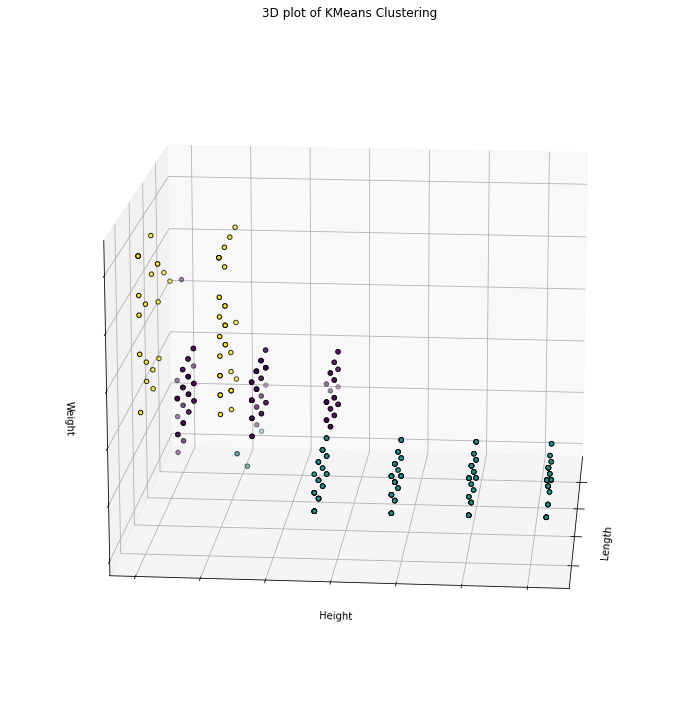

In [32]:
# Let us try with K = 3 (to demonstrate the 3d plot using mplot3d)
from mpl_toolkits.mplot3d import Axes3D

## 3D plots of clusters


fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=5)
k3_model=KMeans(3)
k3_model.fit(sdata)
labels = k3_model.labels_
ax.scatter(sdata.iloc[:, 0], sdata.iloc[:, 1], sdata.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')
print("The lower class, middle class and Elite class highly visible in the plot below for K = 3")
print("\n","So the K = 3 is a good cluster")

**Insightes While K=3**


**Group = 1**
* 251 customers belongs to Group 1
* Credit limits starts from 5000 to 200000 - (upper class - higher credit limit)
* No of credit cards ranges from 2 to 10 - mean = 6.5
* Total_vists_bank ranges from 0 to 3 - mean = 2.09
* Total_visits_online ranges from 0 to 15 - mean = 1.89 very less 
* Total_Call_made ranges from 0 to 4 


**Group 1 - has 251 Customers credit limits between 5000 to 200000 (Elite class) having average credit cards 6.5. Average visit is 2.09, average online 1.89 with total calls 0-4. So the Elite class customer they many accounts with many banks so its very normal to have average 6.5 cards. The number of visits and call to bank also limited. However the number of online visits were much higher than other 2 classes..**


**---They are potential customers for credit cards.**  
**---Customer support expectation also very less for those Elite Group = 1**


**Group = 0** 

* 190 customers belongs to Group 0
* Credit limits starts from 5000 to 75000 - (Middle class - medium credit limit)
* No of credit cards ranges from 4 to 7 - mean = 5.47 - which is higher than Group 2 and little less than Group 1
* Total_vists_bank ranges from 4 to 5 - mean = 4.5 - which is higher than Group 2 and little less than Group 1
* Total_visits_online ranges from 0 to 2 - mean = 1.01 - which is higher than Group 2 and little less than Group 1
* Total_Call_made ranges from 0 to 4 - mean = 1.93 - which is nearly equal to Group 1 and less than Group 2 



**Group 0 - has 190 Customers credit limits between 5000 to 75000 (Middle class) having average credit cards 5.47. Average visit is 4.5 which is higher then other groups, average online 4.5 which is higher than other 2 groups with total calls 0-4. So the Middle class customer they peer pressure to show them as Elite class they will have many accounts with many banks so its very normal to have average 5.47 cards. The number of visits and call to bank also higer than other 2 groups so this group need special support program**

**---Middle class customer they peer pressure to show them as Elite class so potential customers for credit cards.**  
**---Bank needs special support program for these middle class for their visits as well as online**



**Group = 2**
* 219 customers belongs to Group 2
* Credit limits starts from 3000 to 50000 - (Lower class - lower credit limit less than 50000)
* No of credit cards ranges from 1 to 4 - mean = 2.3
* Total_vists_bank ranges from 0 to 2 - mean = 0.9
* Total_visits_online ranges from 1 to 10 - mean = 3.57 very less 
* Total_Call_made ranges from 2 to 10 -  mean = 1.93


**Group 2 - has 190 Customers credit limits between 3000 to 5000 (lower class) having average credit cards 2.3. Average visit is 0.9 which is lower than other groups, average online 3.57 which is lower than other 2 groups with total calls 0-4. The number of visits and call to bank also lower than other 2 groups however their call made to custoers are much higher than other 2 customers**

**---Lower class group 2 are not potential customers for credit cards.**  
**---Bank does not required special support program for these lower class for their visits as well as online**
**---However they have higher bank visits compre to other 2 class so they need special program for bank visits.**

## When K= 4

In [33]:
# Let us first start with K = 4
final_model=KMeans(4)
final_model.fit(sdata)
prediction=final_model.predict(sdata)

#Append the prediction 
sdata["GROUP"] = prediction
cdata["GROUP"] = prediction
print("Groups Assigned : \n")
cdata.head()

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,3
1,50000,3,0,10,9,0
2,50000,7,1,3,4,3
3,30000,5,1,1,4,3
4,100000,6,0,12,3,1


In [34]:
sdata['GROUP'].unique()

array([3, 0, 1, 2])

In [35]:
gdata = sdata.groupby(['GROUP'])
gdata.mean()

,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,
0,-1.064153,-0.901888,0.329303,1.161861
1,1.862226,-1.105763,2.827319,-0.874330
2,0.356795,1.295713,-0.543901,-0.575064
3,0.380503,0.047080,-0.561263,-0.530073


In [36]:
gdata = cdata.groupby(['GROUP'])
gdata.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,12184.684685,2.400901,0.932432,3.572072,6.909910
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,31226.315789,5.478947,4.515789,1.010526,1.936842
3,36005.050505,5.530303,2.479798,0.959596,2.065657


## BOX PLOT Analysis - K= 4

array([[<AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[GROUP]'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

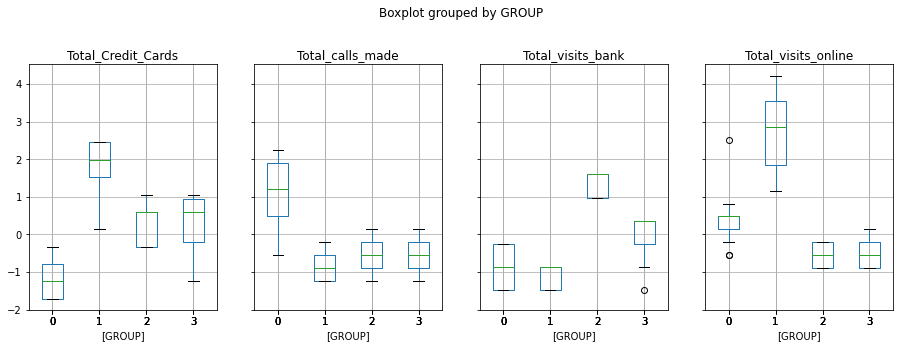

In [37]:
sdata.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [38]:
cdataG0 = cdata[cdata['GROUP']==0]
cdataG0.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,222.0,12184.684685,5257.800896,3000.0,8000.0,12000.0,16000.0,50000.0
Total_Credit_Cards,222.0,2.400901,1.099815,1.0,1.0,2.0,3.0,4.0
Total_visits_bank,222.0,0.932432,0.801544,0.0,0.0,1.0,2.0,2.0
Total_visits_online,222.0,3.572072,1.207718,1.0,3.0,4.0,4.0,10.0
Total_calls_made,222.0,6.909910,1.949821,2.0,5.0,7.0,9.0,10.0
GROUP,222.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [39]:
cdataG1 = cdata[cdata['GROUP']==1]
cdataG1.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,50.0,141040.00,34457.877272,84000.0,108750.0,145500.0,170000.0,200000.0
Total_Credit_Cards,50.0,8.74,1.274715,5.0,8.0,9.0,10.0,10.0
Total_visits_bank,50.0,0.60,0.494872,0.0,0.0,1.0,1.0,1.0
Total_visits_online,50.0,10.90,2.880264,6.0,8.0,11.0,13.0,15.0
Total_calls_made,50.0,1.08,0.876915,0.0,0.0,1.0,2.0,3.0
GROUP,50.0,1.00,0.000000,1.0,1.0,1.0,1.0,1.0


In [40]:
cdataG2 = cdata[cdata['GROUP']==2]
cdataG2.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,190.0,31226.315789,21659.127922,5000.0,12000.0,28000.0,47000.0,75000.0
Total_Credit_Cards,190.0,5.478947,1.139516,4.0,4.0,6.0,6.0,7.0
Total_visits_bank,190.0,4.515789,0.501071,4.0,4.0,5.0,5.0,5.0
Total_visits_online,190.0,1.010526,0.878849,0.0,0.0,1.0,2.0,2.0
Total_calls_made,190.0,1.936842,1.409045,0.0,1.0,2.0,3.0,4.0
GROUP,190.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


In [41]:
cdataG3 = cdata[cdata['GROUP']==3]
cdataG3.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,198.0,36005.050505,22463.619200,5000.0,16000.00,34500.0,56000.00,100000.0
Total_Credit_Cards,198.0,5.530303,1.156132,2.0,4.25,6.0,6.75,7.0
Total_visits_bank,198.0,2.479798,0.558366,0.0,2.00,3.0,3.00,3.0
Total_visits_online,198.0,0.959596,0.835983,0.0,0.00,1.0,2.00,3.0
Total_calls_made,198.0,2.065657,1.453416,0.0,1.00,2.0,3.00,4.0
GROUP,198.0,3.000000,0.000000,3.0,3.00,3.0,3.00,3.0


## 3-D View of clusters - K = 4

The lower class, middle class, upper middle class and Elite class highly visible in the plot below for K = 4

 So the K = 4 is a good cluster


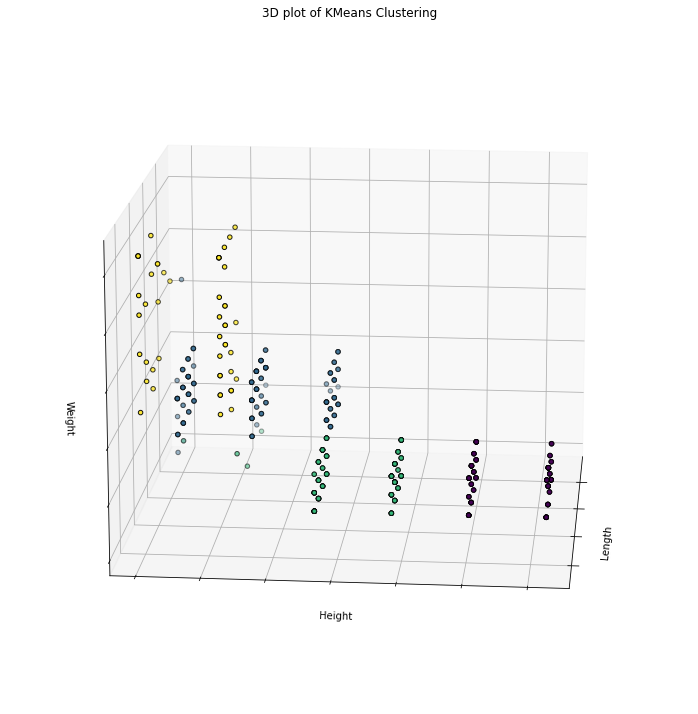

In [42]:
# Let us try with K = 4 (to demonstrate the 3d plot using mplot3d)
from mpl_toolkits.mplot3d import Axes3D

## 3D plots of clusters


fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=5)
k4_model=KMeans(4)
k4_model.fit(sdata)
labels = k4_model.labels_
ax.scatter(sdata.iloc[:, 0], sdata.iloc[:, 1], sdata.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')
print("The lower class, middle class, upper middle class and Elite class highly visible in the plot below for K = 4")
print("\n","So the K = 4 is a good cluster")

## 3-D View of clusters - K = 5

The lower class is visible however upper middle class and Elite class looks combersome in the plot below for K = 5

 So the K = 5 is not a good cluster


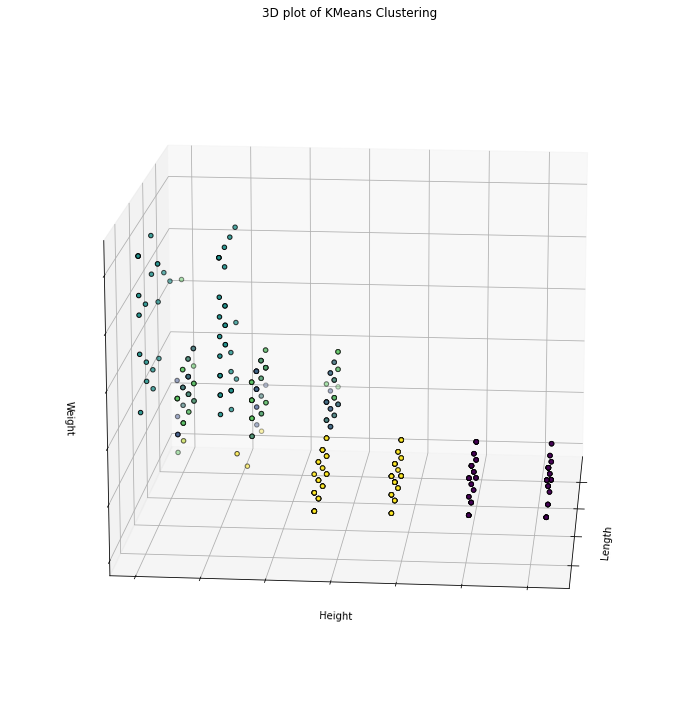

In [43]:
# Let us try with K = 5 (to demonstrate the 3d plot using mplot3d)
from mpl_toolkits.mplot3d import Axes3D

## 3D plots of clusters


fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=5)
k5_model=KMeans(5)
k5_model.fit(sdata)
labels = k5_model.labels_
ax.scatter(sdata.iloc[:, 0], sdata.iloc[:, 1], sdata.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')
print("The lower class is visible however upper middle class and Elite class looks combersome in the plot below for K = 5")
print("\n","So the K = 5 is not a good cluster")

**Insightes While K=4**


**Group = 0**
* 219 customers belongs to Group 1
* Credit limits starts from 5000 to 50000 - (lower class)
* No of credit cards ranges from 1 to 4 - mean = 1.09
* Total_vists_bank ranges from 0 to 2 - mean = 0.90
* Total_visits_online ranges from 1 to 10 - mean = 3.59 very less 
* Total_Call_made ranges from 2 to 10 - mean = 6.9

**Group 0 - has 219 Customers credit limits between 5000 to 50000 (lower class) having average credit cards 1.09. Average visit is 0.9, average online 6.9 with total calls 2-10. The lower class customer they have average 6.5 cards. The number of visits 0-2 and call to bank limited. Number of online visits and calls made were much higher than other 2 classes.**

**They are not potential customers for credit cards.**  
**The group need special support program for online and calls**

**Group = 1** 

* 201 customers belongs to Group 1
* Credit limits starts from 5000 to 100000 - (Middle class - medium credit limit)
* No of credit cards ranges from 2 to 7 - mean = 5.5 
* Total_vists_bank ranges from 0 to 3 - mean = 2.46 - 
* Total_visits_online ranges from 0 to 2 - mean = 0.99 - 
* Total_Call_made ranges from 0 to 4 - mean = 2.09 - 

**Group 1 - has 201 Customers credit limits between 5000 to 100000 (Middle class) having average credit cards 5.5. Average visit is 2.46 which is higher, average online 0.99 which is less than other 3 groups with total calls 0-4. So the Middle class customer they peer pressure to show them as Elite class they  so its very normal to have average 5.5 cards. The number of visits and call to bank also higer than other 2 groups so this group need special support program**

**Middle class customer they peer pressure to show them as middle class so potential customers for credit cards.**  
**Bank does not required special support program for these middle class for their visits as well as online**


**Group = 2**
* 190 customers belongs to Group 2
* Credit limits starts from 5000 to 750000 - (upper middle class )
* No of credit cards ranges from 4 to 7 - mean = 5.47
* Total_vists_bank ranges from 4 to 5 - mean = 4.5
* Total_visits_online ranges from 0 to 2 - mean = 1.01 very less 
* Total_Call_made ranges from 0 to 4 -  mean = 1.93

**Group 2 - has 190 Customers credit limits between 5000 to 75000 (upper middle class) having average credit cards 5.47. Average visit is 4.5, average online 1.01 which is lower than other 2 groups with total calls 0-4. The number of visits and call to bank also lower than other 2 groups however their call made to custoers are much higher than other 2 customers**

**upper middle class group 2 are potential customers for credit cards.**  
**Bank does not required special support program for these middle class for their visits as well as online**
**However they have higher visits to other 2 class so they need special program for bank visits.**


**Group = 3**
* 50 customers belongs to Group 3
* Credit limits starts from 84000 to 200000 - (Elite class )
* No of credit cards ranges from 5 to 10 - mean = 8.74
* Total_vists_bank ranges from 1 to 1 - mean = 0.49
* Total_visits_online ranges from 6 to 15 - mean = 10.90 very less 
* Total_Call_made ranges from 1 to 3 -  mean = 1.08


**Group 3 - has 50 Customers credit limits between 84000 to 200000 (Elite class) having average credit cards 8.74. Average visit is 0.49, average online 10.90 with total calls 1-3. Elite class customer have average 8.74 cards. The number of visits 1 and call to bank also limited. Number of online visits were much higher than other 2 classes.**

**They are potential customers for credit cards.**  
**Customer support for (bank visit and call) expectation also very less for those Elite Group = 1**
**However they are higher online visits - eligible for elite online support like AI-chatbox etc..**

#######################################################################################################################
### K-Mean Clustering - Decision

**Considering K=3 and K=4, I believe K=4 i mean 4 clusters can be formed from the sample they have provided. K=4 which shows ELITE Class as a separate class with 50 customers which able to define special support program and Also potential credit card customers to define campaing for them**

#######################################################################################################################

# Hierarchical Clustering

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(sdata, 'ward', metric='euclidean')
Z.shape

(659, 4)

In [47]:
Z[:]

array([[  26.        ,   53.        ,    0.        ,    2.        ],
       [ 121.        ,  163.        ,    0.        ,    2.        ],
       [  74.        ,  137.        ,    0.        ,    2.        ],
       ...,
       [1313.        , 1314.        ,   22.28926534,  388.        ],
       [1312.        , 1315.        ,   40.39371705,  272.        ],
       [1316.        , 1317.        ,   62.8730671 ,  660.        ]])

## Plot Dendogram

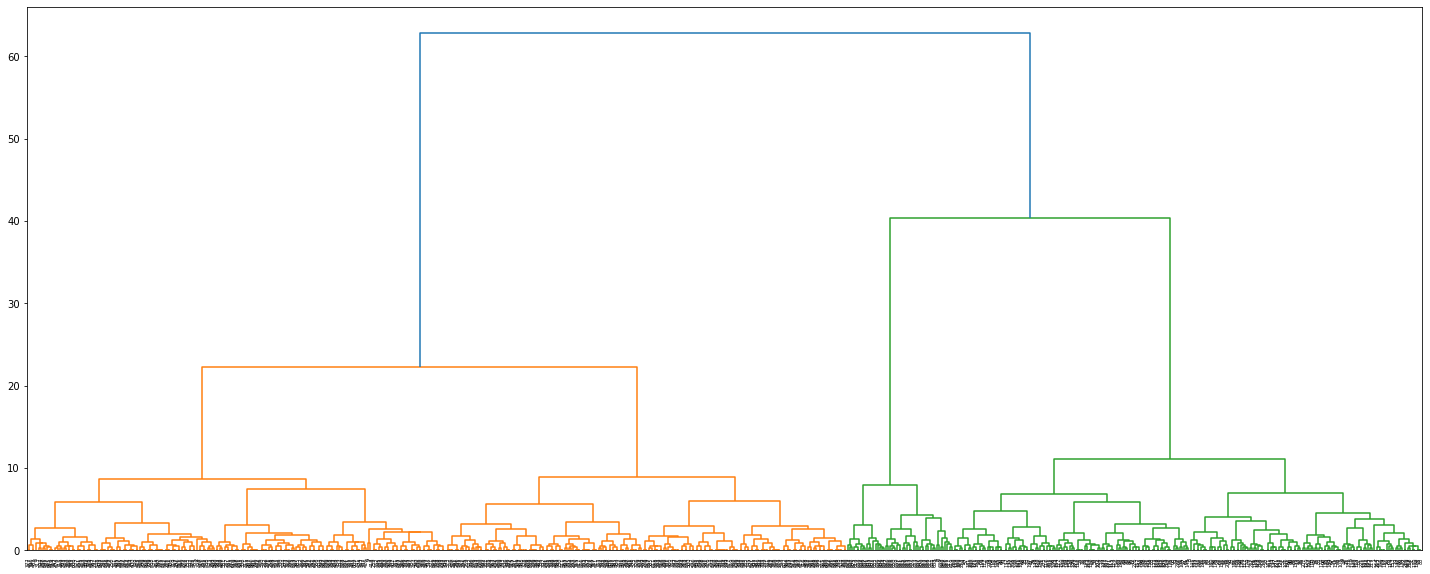

In [48]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

### Insights

**As like Kmean hirerichial cluster also shows 4 clusters (Colours) - which should be appropriate**

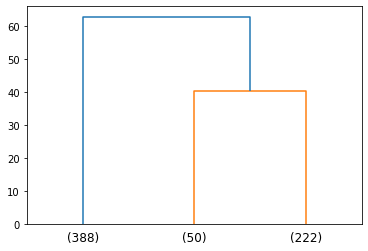

In [49]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(Z, truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

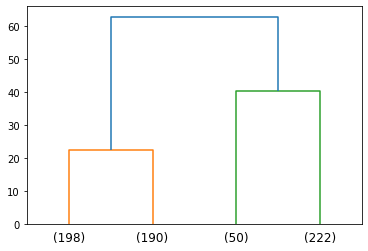

In [50]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(Z, truncate_mode='lastp',  # show only the last p merged clusters 
           p=4,  # show only the last p merged clusters
          )
plt.show()

###  Insights - as like Kmean hirerichial cluster also shows 4 clusters (Colours) - which should be appropriate 
### Hierarchical Clustering also defines 4 meaningful clusters at the end with the sample size (219), (50), (201) and (190)

## Execute hierarchical clustering (with different linkages)

In [51]:
import matplotlib.cm as cm

range_n_clusters= range(2,6)

for k in range_n_clusters:    
    print("\n\n","Number of Clusters: ", k,"\n")

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    for link_ in ["ward", "complete", "average", "single"]:
      clusterer = AgglomerativeClustering(n_clusters=k, affinity='euclidean',  linkage= link_)
      cluster_labels = clusterer.fit_predict(sdata)
      s_score = silhouette_score(sdata, cluster_labels)
      print(link_ + " -- silhouette_score is :", s_score.round(3))



 Number of Clusters:  2 

ward -- silhouette_score is : 0.546
complete -- silhouette_score is : 0.431
average -- silhouette_score is : 0.431
single -- silhouette_score is : 0.546


 Number of Clusters:  3 

ward -- silhouette_score is : 0.629
complete -- silhouette_score is : 0.629
average -- silhouette_score is : 0.629
single -- silhouette_score is : 0.629


 Number of Clusters:  4 

ward -- silhouette_score is : 0.509
complete -- silhouette_score is : 0.509
average -- silhouette_score is : 0.481
single -- silhouette_score is : 0.556


 Number of Clusters:  5 

ward -- silhouette_score is : 0.368
complete -- silhouette_score is : 0.376
average -- silhouette_score is : 0.413
single -- silhouette_score is : 0.439


### Link 'WARD' shows highest Silhouette scores for the clusters 3 and 4

## Hierarchical Clustering when n_clusters = 3

In [55]:
Hmodel = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')

In [67]:
Hmodel.fit(sdata)

AgglomerativeClustering(n_clusters=3)

In [72]:
hdata['labels'] = Hmodel.labels_
cdata['labels'] = Hmodel.labels_

cdata.head(10)

#custDataAttr.groupby(["labels"]).count()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP,labels
0,100000,2,1,1,0,3,0
1,50000,3,0,10,9,0,1
2,50000,7,1,3,4,3,0
3,30000,5,1,1,4,3,0
4,100000,6,0,12,3,1,2
5,20000,3,0,1,8,0,1
6,100000,5,0,11,2,1,2
7,15000,3,0,1,1,3,0
8,5000,2,0,2,2,0,1
9,3000,4,0,1,7,0,1


In [76]:
hdata_group = hdata.groupby(['labels'])
hdata_group.mean()

,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,
0,0.368893,0.658524,-0.552761,-0.552105
1,-1.064153,-0.901888,0.329303,1.161861
2,1.862226,-1.105763,2.827319,-0.874330


In [79]:
hdata['labels'].value_counts()

0    388
1    222
2     50
Name: labels, dtype: int64

In [80]:
hdata = sdata.drop(['GROUP'], axis=1)

## BOX PLOT - Analysis

array([[<AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[labels]'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

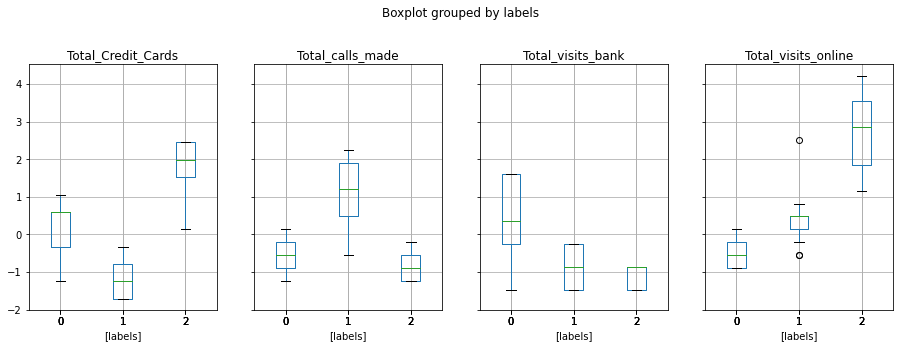

In [81]:
hdata.boxplot(by='labels', layout = (2,4),figsize=(15,10))

In [82]:
hdataG0 = cdata[cdata['labels']==0]
hdataG0.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,388.0,33664.948454,22174.224584,5000.0,13000.0,31000.0,52000.0,100000.0
Total_Credit_Cards,388.0,5.505155,1.146830,2.0,4.0,6.0,6.0,7.0
Total_visits_bank,388.0,3.476804,1.148858,0.0,2.0,3.0,5.0,5.0
Total_visits_online,388.0,0.984536,0.856511,0.0,0.0,1.0,2.0,3.0
Total_calls_made,388.0,2.002577,1.431464,0.0,1.0,2.0,3.0,4.0
GROUP,388.0,2.510309,0.500539,2.0,2.0,3.0,3.0,3.0
labels,388.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [83]:
hdataG1 = cdata[cdata['labels']==1]
hdataG1.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,222.0,12184.684685,5257.800896,3000.0,8000.0,12000.0,16000.0,50000.0
Total_Credit_Cards,222.0,2.400901,1.099815,1.0,1.0,2.0,3.0,4.0
Total_visits_bank,222.0,0.932432,0.801544,0.0,0.0,1.0,2.0,2.0
Total_visits_online,222.0,3.572072,1.207718,1.0,3.0,4.0,4.0,10.0
Total_calls_made,222.0,6.909910,1.949821,2.0,5.0,7.0,9.0,10.0
GROUP,222.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
labels,222.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [84]:
hdataG2 = cdata[cdata['labels']==2]
hdataG2.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,50.0,141040.00,34457.877272,84000.0,108750.0,145500.0,170000.0,200000.0
Total_Credit_Cards,50.0,8.74,1.274715,5.0,8.0,9.0,10.0,10.0
Total_visits_bank,50.0,0.60,0.494872,0.0,0.0,1.0,1.0,1.0
Total_visits_online,50.0,10.90,2.880264,6.0,8.0,11.0,13.0,15.0
Total_calls_made,50.0,1.08,0.876915,0.0,0.0,1.0,2.0,3.0
GROUP,50.0,1.00,0.000000,1.0,1.0,1.0,1.0,1.0
labels,50.0,2.00,0.000000,2.0,2.0,2.0,2.0,2.0


## 3-D View of 3 clusters 

The lower class, middle class, upper middle class and Elite class highly visible in the plot below for cluster  = 3

 So the 3 clusters is appropriate


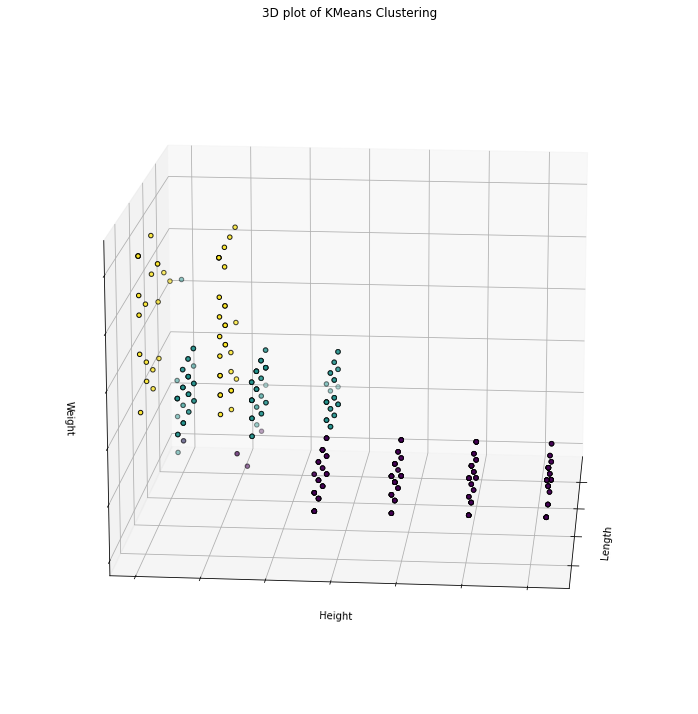

In [95]:
# Let us try with 3 clusters (to demonstrate the 3d plot using mplot3d)
from mpl_toolkits.mplot3d import Axes3D

## 3D plots of clusters


fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=5)
Hmodel = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
Hmodel.fit(sdata)
labels = Hmodel.labels_
ax.scatter(sdata.iloc[:, 0], sdata.iloc[:, 1], sdata.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')
print("The lower class, middle class, upper middle class and Elite class highly visible in the plot below for cluster  = 3")
print("\n","So the 3 clusters is appropriate")

### Insights from BoxPlot

**Hirarchy shows clear visibility of the groups among all the columns**

### hierarchical clustering -- 3 clusters


**Group = 0**
* 388 customers belongs to Group 0
* Credit limits starts from 5000 to 100000 - (middle class)
* No of credit cards ranges from 2 to 7 - mean = 5.5
* Total_vists_bank ranges from 0 to 5 - mean = 3.47
* Total_visits_online ranges from 0 to 3 - mean = 0.98 very less 
* Total_Call_made ranges from 1 to 4 - mean = 2.0


**Group = 1**
* 222 customers belongs to Group 1
* Credit limits starts from 3000 to 50000 - (lower class) --- lowest 
* No of credit cards ranges from 1 to 4 - mean = 2.4 -- lowest
* Total_vists_bank ranges from 0 to 2 - mean = 0.93  -- lowest
* Total_visits_online ranges from 1 to 10 - mean = 3.57 -- lowest 
* Total_Call_made ranges from 2 to 10 - mean = 6.9  --- Highest


**Group = 2**
* 50 customers belongs to Group 2
* Credit limits starts from 84000 to 200000 - (Elite class) -- Highest
* No of credit cards ranges from 1 to 4 - mean = 8.74	--- Highest
* Total_vists_bank ranges from 1 to 1 - mean = 0.60   --- lowest
* Total_visits_online ranges from 5 to 15 - mean = 10.9	--- Highest
* Total_Call_made ranges from 0 to 3 - mean = 1.08 -- lowest  


**Elite class group 2 -- highest credit card holders are potential customers for credit cards. However they are highest online customers they expect chat box or online support program. They are least visit bank and call made to Banks.**

**Lower class group 1 -- Lowest credit card holders are not potential customers for credit cards. They need special program for online customers as elite group + they had highest caller to bank they need special support programs for the same.**

**Middle class group 0 -- Middle value for all columns they are potential customers for credit cards. They highest bank visitors they need special program for bank supports. They are least online visitor and call made to bank.**

## Hierarchical Clustering when n_clusters = 4

In [85]:
Hmodel = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='ward')
Hmodel.fit(sdata)

hdata['labels'] = Hmodel.labels_
cdata['labels'] = Hmodel.labels_

cdata.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP,labels
0,100000,2,1,1,0,3,3
1,50000,3,0,10,9,0,0
2,50000,7,1,3,4,3,3
3,30000,5,1,1,4,3,3
4,100000,6,0,12,3,1,2
5,20000,3,0,1,8,0,0
6,100000,5,0,11,2,1,2
7,15000,3,0,1,1,3,3
8,5000,2,0,2,2,0,0
9,3000,4,0,1,7,0,0


In [86]:
hdata_group = hdata.groupby(['labels'])
hdata_group.mean()

,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,
0,-1.064153,-0.901888,0.329303,1.161861
1,0.356795,1.295713,-0.543901,-0.575064
2,1.862226,-1.105763,2.827319,-0.874330
3,0.380503,0.047080,-0.561263,-0.530073


In [87]:
hdata['labels'].value_counts()

0    222
3    198
1    190
2     50
Name: labels, dtype: int64

## BOX PLOT - Analysis

array([[<AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[labels]'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

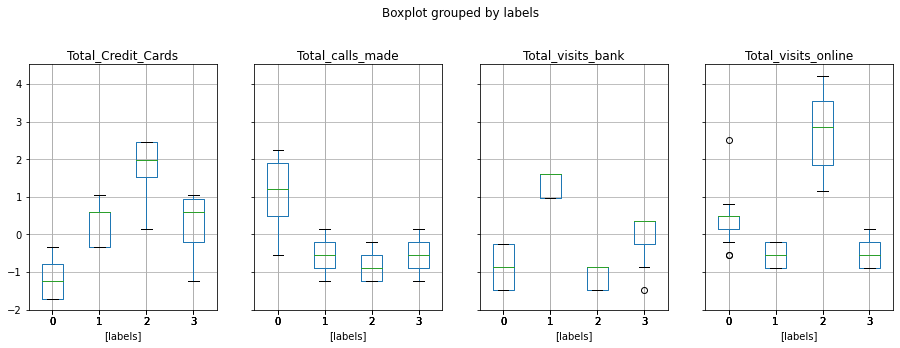

In [88]:
hdata.boxplot(by='labels', layout = (2,4),figsize=(15,10))

In [89]:
hdataG0 = cdata[cdata['labels']==0]
hdataG0.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,222.0,12184.684685,5257.800896,3000.0,8000.0,12000.0,16000.0,50000.0
Total_Credit_Cards,222.0,2.400901,1.099815,1.0,1.0,2.0,3.0,4.0
Total_visits_bank,222.0,0.932432,0.801544,0.0,0.0,1.0,2.0,2.0
Total_visits_online,222.0,3.572072,1.207718,1.0,3.0,4.0,4.0,10.0
Total_calls_made,222.0,6.909910,1.949821,2.0,5.0,7.0,9.0,10.0
GROUP,222.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
labels,222.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [90]:
hdataG1 = cdata[cdata['labels']==1]
hdataG1.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,190.0,31226.315789,21659.127922,5000.0,12000.0,28000.0,47000.0,75000.0
Total_Credit_Cards,190.0,5.478947,1.139516,4.0,4.0,6.0,6.0,7.0
Total_visits_bank,190.0,4.515789,0.501071,4.0,4.0,5.0,5.0,5.0
Total_visits_online,190.0,1.010526,0.878849,0.0,0.0,1.0,2.0,2.0
Total_calls_made,190.0,1.936842,1.409045,0.0,1.0,2.0,3.0,4.0
GROUP,190.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
labels,190.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [91]:
hdataG2 = cdata[cdata['labels']==2]
hdataG2.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,50.0,141040.00,34457.877272,84000.0,108750.0,145500.0,170000.0,200000.0
Total_Credit_Cards,50.0,8.74,1.274715,5.0,8.0,9.0,10.0,10.0
Total_visits_bank,50.0,0.60,0.494872,0.0,0.0,1.0,1.0,1.0
Total_visits_online,50.0,10.90,2.880264,6.0,8.0,11.0,13.0,15.0
Total_calls_made,50.0,1.08,0.876915,0.0,0.0,1.0,2.0,3.0
GROUP,50.0,1.00,0.000000,1.0,1.0,1.0,1.0,1.0
labels,50.0,2.00,0.000000,2.0,2.0,2.0,2.0,2.0


In [92]:
hdataG3 = cdata[cdata['labels']==3]
hdataG3.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,198.0,36005.050505,22463.619200,5000.0,16000.00,34500.0,56000.00,100000.0
Total_Credit_Cards,198.0,5.530303,1.156132,2.0,4.25,6.0,6.75,7.0
Total_visits_bank,198.0,2.479798,0.558366,0.0,2.00,3.0,3.00,3.0
Total_visits_online,198.0,0.959596,0.835983,0.0,0.00,1.0,2.00,3.0
Total_calls_made,198.0,2.065657,1.453416,0.0,1.00,2.0,3.00,4.0
GROUP,198.0,3.000000,0.000000,3.0,3.00,3.0,3.00,3.0
labels,198.0,3.000000,0.000000,3.0,3.00,3.0,3.00,3.0


## 3-D View of 4 clusters 

The lower class, middle class, upper middle class and Elite class highly visible in the plot below for cluster  = 4

 However - lower class and middle class - ploted at same plane - so 4 cluster is not appropriate


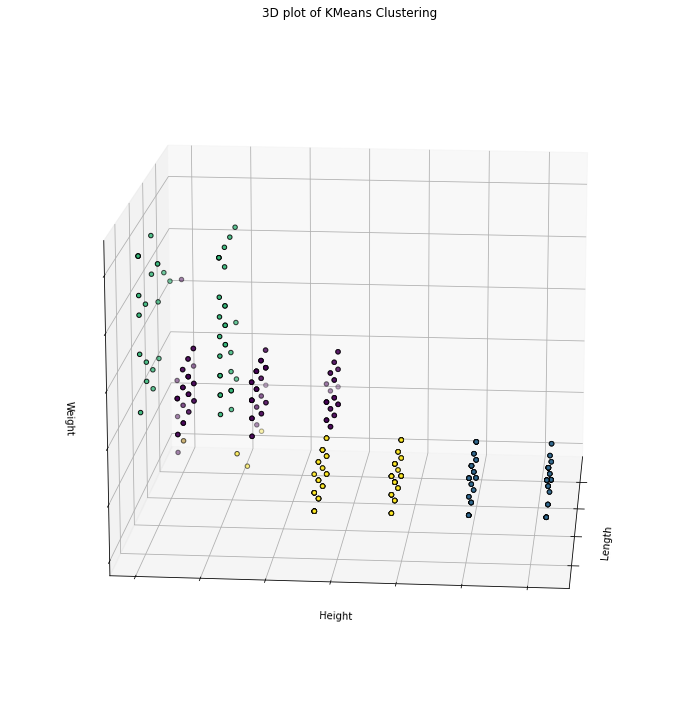

In [97]:
# Let us try with 4 clusters (to demonstrate the 3d plot using mplot3d)
from mpl_toolkits.mplot3d import Axes3D

## 3D plots of clusters


fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=5)
Hmodel = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='ward')
Hmodel.fit(sdata)
labels = Hmodel.labels_
ax.scatter(sdata.iloc[:, 0], sdata.iloc[:, 1], sdata.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')
print("The lower class, middle class, upper middle class and Elite class highly visible in the plot below for cluster  = 4")
print("\n","However - lower class and middle class - ploted at same plane - so 4 cluster is not appropriate")

## 3-D View of 5 clusters 

The lower class, middle class, upper middle class and Elite class highly visible in the plot below for cluster  = 5

 However - lower class and middle class - ploted at same plane and upper middle class and elite class on the same plane, so 5 cluster is not appropriate


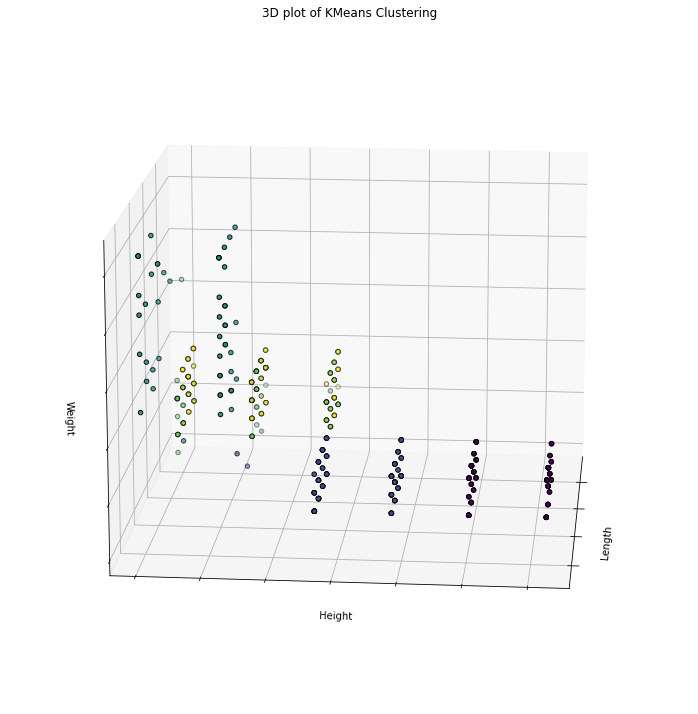

In [106]:
# Let us try with 5 clusters (to demonstrate the 3d plot using mplot3d)
from mpl_toolkits.mplot3d import Axes3D

## 3D plots of clusters


fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=5)
Hmodel = AgglomerativeClustering(n_clusters=5, affinity='euclidean',  linkage='ward')
Hmodel.fit(sdata)
labels = Hmodel.labels_
ax.scatter(sdata.iloc[:, 0], sdata.iloc[:, 1], sdata.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')
print("The lower class, middle class, upper middle class and Elite class highly visible in the plot below for cluster  = 5")
print("\n","However - lower class and middle class - ploted at same plane and upper middle class and elite class on the same plane, so 5 cluster is not appropriate")

hierarchical clustering -- 4


**Group = 0**
* 222 customers belongs to Group 0
* Credit limits starts from 3000 to 50000 - (lower class)
* No of credit cards ranges from 1 to 4 - mean = 2.4
* Total_vists_bank ranges from 0 to 2 - mean = 0.93
* Total_visits_online ranges from 1 to 10 - mean = 3.57 
* Total_Call_made ranges from 2 to 10 - mean = 6.9 


**Group = 1**
* 222 customers belongs to Group 1
* Credit limits starts from 5000 to 75000 - (lower class) --- 
* No of credit cards ranges from 4 to 7 - mean = 5.47 -- 
* Total_vists_bank ranges from 4 to 5 - mean = 4.5  -- 
* Total_visits_online ranges from 0 to 2 - mean = 1.0 -- 
* Total_Call_made ranges from 0 to 4 - mean = 1.93  --- 


**Group = 2**
* 50 customers belongs to Group 2
* Credit limits starts from 84000 to 200000 - (Elite class) -- Highest
* No of credit cards ranges from 1 to 4 - mean = 8.74	--- Highest
* Total_vists_bank ranges from 1 to 1 - mean = 0.60   --- lowest
* Total_visits_online ranges from 5 to 15 - mean = 10.9	--- Highest
* Total_Call_made ranges from 0 to 3 - mean = 1.08 -- lowest  


**Group = 3**
* 198 customers belongs to Group 3
* Credit limits starts from 5000 to 100000 
* No of credit cards ranges from 2 to 7 - mean = 5.5  
* Total_vists_bank ranges from 0 to 3 - mean = 2.47   
* Total_visits_online ranges from 0 to 3 - mean = 0.95	
* Total_Call_made ranges from 0 to 4 - mean = 2.4 


**Elite class group 2 -- highest credit card holders are potential customers for credit cards. However they are highest online customers they expect chat box or online support program. They are least visit bank and call made to Banks. -- no changes in Elite class comparting clusters 3.**

**Lower class group 0 -- Lowest credit card holders are not potential customers for credit cards. They need special program for online customers as elite group + they had highest caller to bank they need special support programs for the same -- no changes in Elite class comparting clusters 3.**

**Middle class group 3 and 1 -- Middl class have been split into 2. Middle value for all columns they are potential customers for credit cards. They highest bank visitors they need special program for bank supports. They are least online visitor and call made to bank. Comparing cluster 3 middle class have been split into 2 which is not meanful in my view.**

## Cophenet Index & Cophenet Coefficent

In [98]:
max_d = 20

In [99]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 4, 1, 1, 3, 4, 3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2,
       1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,

In [100]:
# Calculate Avg Silhoutte Score

from sklearn.metrics import silhouette_score
silhouette_score(sdata,clusters).round(3)

0.515

### Silhoutte Score is 0.515 which is better score as its close to 1

## Cophenetic Coefficient

In [101]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [102]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(sdata, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(sdata))

c.round(3)

0.947

### Cophenetic Coefficient is 0.94 which is very close to 1

# Insights from Clusters

## K- Mean Clustering

**Considering K=3 and K=4, I believe K=4 i mean 4 clusters can be formed from the sample they have provided.**

**K=4 which shows ELITE Class as a separate class with 50 customers which able to define special support program and Also potential credit card customers to define campaing for those clusters.**

**In that view I believer cluster K = 4 will be more meaningful and appropriate cluster**

**The Average Silhoutte Score is 0.54 which is better score as its close to 1**



## Hierarchical Clusters

**As like Kmean hirerichial cluster also shows 4 clusters (Colours) - which should be appropriate**

**The Average Silhoutte Score is 0.515 which is better score as its close to 1**

**Cophenetic Coefficient is 0.94 which is very close to 1**

## Insights - Comparing K-Mean vs Hirerichical Clusters**

**For K-mean cluser K = 4 shows appropriate however hierarchical cluster 3 shows appropriate**

**like K-mean, hirerichial cluster also shows 4 clusters (Colours) - which should be appropriate**

**Hierarchical Clustering also defines 4 meaningful clusters at the end with the sample size (219), (50), (201) and (190)**

**But Hierarchial Clustering's Average Silhoutte Score is 0.598 little higher than K Means which is 0.54**

**Hierarchial Clusters Cophent index coefficient is 0.947 which is very close to 1**



## Business Insights

**Group 3 - Elite Group - Credit Limit - 84000 to 200000** 

--They are potential customers for credit cards.  
--Customer support for (bank visit and call) expectation also very less for those Elite Group = 1.
--However they are higher online visits - eligible for elite online support like AI-chatbox etc..

**Group 2 - upper middle class Credit Limit - 5000 to 75000**

--Upper middle class group 2 are potential customers for credit cards.
--Bank does not required special support program for these middle class for their visits as well as online.
--However they have higher visits to other 2 class so they need special program for bank visits.

**Group 1 - middle class - Credit Limit - 5000 to 100000**

--Middle class customer they peer pressure to show them as middle class so potential customers for credit cards.
--Bank does not required special support program for these middle class for their visits as well as online.

**Group 0 - lower class - Credit Limit - 5000 to 50000**

--They are not potential customers for credit cards.  
--The group need special support program for online and calls


## Business Recomendations

**1. Customers in the medium group (having Label 1) are not engaged much in online activities, one of the exercise can be to engage them online. 
If they join online, promotions and offers can be communicated to them with much ease.**


**2. Customers in low group (label 0) can further be binned to check if there are any extreme groups having high average credit limit.**

**3. These customers can be given more offers and new credit cards so that we can have them in medium group (label 1 ) over a period of time. 
Similarly we can perform this for medium customers (label 1) and try to have them in high group (label 2) over a period of time.**

**4. Customers in low group (label 0) make the most number of customer care calls, these customers can be offered to try and move them to medium group over a period of time.**